# Unveiling Insights: Exploring and Analyzing Telecom Company for Customer Churn

----------------------------------------------------------------------
Questions will be adressed in this project:

1. Does gender affect whether customers stay with the company, and if it does, is there a pattern?

2. What percentage of customers have switched to another company?

3. How do different contract types affect customer retention?

4. What is the relationship between payment method and customer retention?

5. How does the presence or absence of a partner affect customer retention?

4. Which type of internet service provided by the telecom company leads to more churn?

In [1]:
import pandas as pd
import numpy as np

**The data set includes information about:**

1)Customers who left the company – the column is called Churn.

2)Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.

3)Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.

4)Demographic info about customers – gender, age range, and if they have partners and dependents.

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv('/Users/grigoriasourri/Downloads/Churn.csv.xls')

# Display the first 10 rows of the DataFrame
df.head(10)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


_________________________________________________________________________

**EDA**
_________________________________________________________________________

Lets start with **Explanatory Data Analysis** and explore-modify our dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


------------------------------------------------------------------------------------------------------------------
- The 'TotalCharges' column should be converted to float for numerical accuracy. Column names need standardization to ensure consistency. In the 'SeniorCitizen' column, binary values should be replaced with 'No' and 'Yes' for clarity.

In [4]:
df.rename(columns={'customerID':'CustomerID', 'gender': 'Gender', 'tenure': 'Tenure'}, inplace=True)


In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df['TotalCharges'].dtype)

float64


In [6]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df['Tenure'].value_counts()

Tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

We can also observe that there are rows with zero values in the 'Tenure' column while other corresponding columns, like 'MonthlyCharges', have data. This action accounts for approximately 0.15% of the total dataset. We will delete the rows as it is not going to cause disorder.

In [8]:
df.drop(labels=df[df['Tenure'] == 0].index, axis=0, inplace=True)

We see that we have 11 missing values in Total Charges. We can either delete them or fill the value with the mean. In this case it is preferable to use the mean because it provides a representative measure of the typical value.

In [10]:
df.fillna(df["TotalCharges"].mean())

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


-------------------------------------------------------------------------------------------------------------------
Lets take a closer look with the function describe and generate summary statistics for the numerical columns:
(these statistics provide a summary of the distribution and central tendency of tenure, monthly charges, and total charges among customers. They can help identify trends, patterns, or anomalies in the data that may require further investigation or analysis)

In [11]:
numerical_columns = ['Tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_columns].describe()

,Tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


The average tenure of customers is approximately 32 months, and the average monthly charge is about $64.80.

____________________________________________
**checking if there are missing values**

In [12]:
df.isnull().sum()

CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Save the clean Data Frame so I can browse it and use it for creating Dashboards ( Tablaeu, PowerBI)

In [40]:
churn_cleaned= df.copy()
churn_cleaned.to_csv('clean_churn.csv', index=False)

In [14]:
df.drop(columns=['CustomerID'], inplace=True)

__________________________________________________________________________
# DATA VISUALIZATION
__________________________________________________________________________

**1) Are there any patterns in Churn variable based on the Gender?**

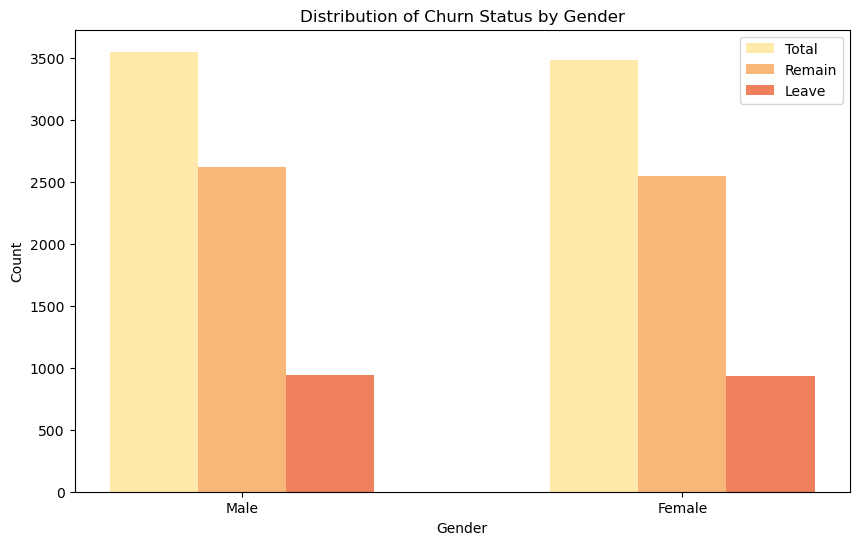

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
gender_counts = df['Gender'].value_counts()
remain_counts = df[df['Churn'] == 'No']['Gender'].value_counts()
leave_counts = df[df['Churn'] == 'Yes']['Gender'].value_counts()
ind = np.arange(len(gender_counts))
width = 0.2  # Width of each bar
plt.figure(figsize=(10, 6))
plt.bar(ind - width, gender_counts.values, width, color= '#ffe9aa', label='Total')
plt.bar(ind, remain_counts.values, width, color='#f8b779', label='Remain')
plt.bar(ind + width, leave_counts.values, width, color='#ef805e', label='Leave')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Churn Status by Gender')
plt.xticks(ind, gender_counts.index)
plt.legend()
plt.show()


Out of the total, 2619 males remained with the company, while 930 males opted to leave. Similarly, 2544 females stayed, but 939 females discontinued their services. Plus, we can assume that Gender balance doesn't significantly impact churn, indicating that other factors drive customer decisions.

In [16]:
df['Gender'].value_counts()

Gender
Male      3549
Female    3483
Name: count, dtype: int64

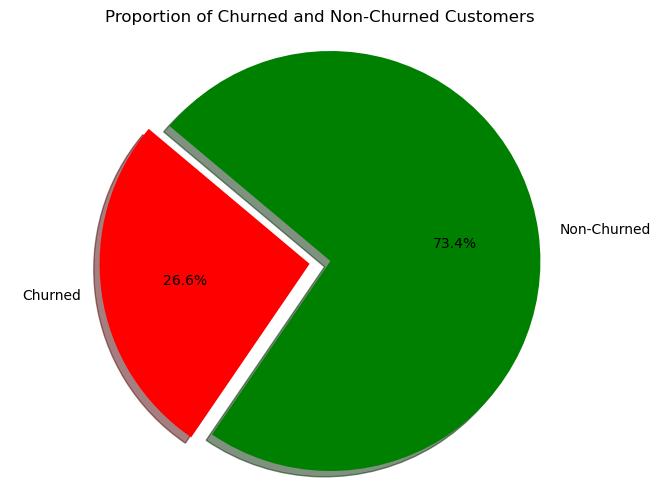

In [17]:
import matplotlib.pyplot as plt

churned_count = df['Churn'].value_counts()['Yes']
non_churned_count = df['Churn'].value_counts()['No']

# Pie chart
labels = ['Churned', 'Non-Churned']
sizes = [churned_count, non_churned_count]
colors = ['red', 'green']
explode = (0.1, 0)  # explode the first slice (Churned)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proportion of Churned and Non-Churned Customers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


26.6 % of customers left and possibly switched to another firm. 

______________________________________________________________________________________________________



**2) Calculate the Churn rate for each contract type**

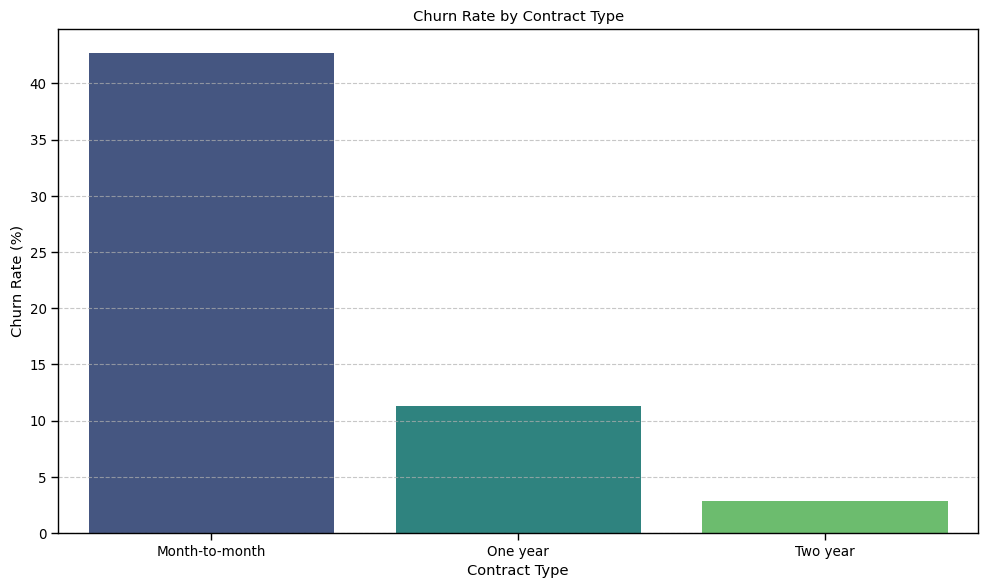

In [29]:
#calculate churn rate for each contract type!
churn_rate_by_contract = df.groupby('Contract')['Churn'].value_counts(normalize=True).loc[:, 'Yes'] * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rate_by_contract.index, y=churn_rate_by_contract.values, palette='viridis')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Contract Type')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The x-axis represents the different contract types, and the y-axis represents the churn rate (in percentage).
Each bar corresponds to a contract type, and its height represents the churn rate for that contract type. It is obvious that customers who had month to month contract tend to churn easily.

In [30]:
contract_counts = {
    'Month-to-month': 3875,                                  #Month-to-month    3875
                                                             #Two year          1695
                                                             #One year          1473
    'Two year': 1695,
    'One year': 1473
}

total_subscribers = sum(contract_counts.values())
for contract, count in contract_counts.items():
    percentage = (count / total_subscribers) * 100
    print(f"{contract}: {percentage:.2f}%")

Month-to-month: 55.02%
Two year: 24.07%
One year: 20.91%


**3) Churn rate by payment Method**

In [33]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [34]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64

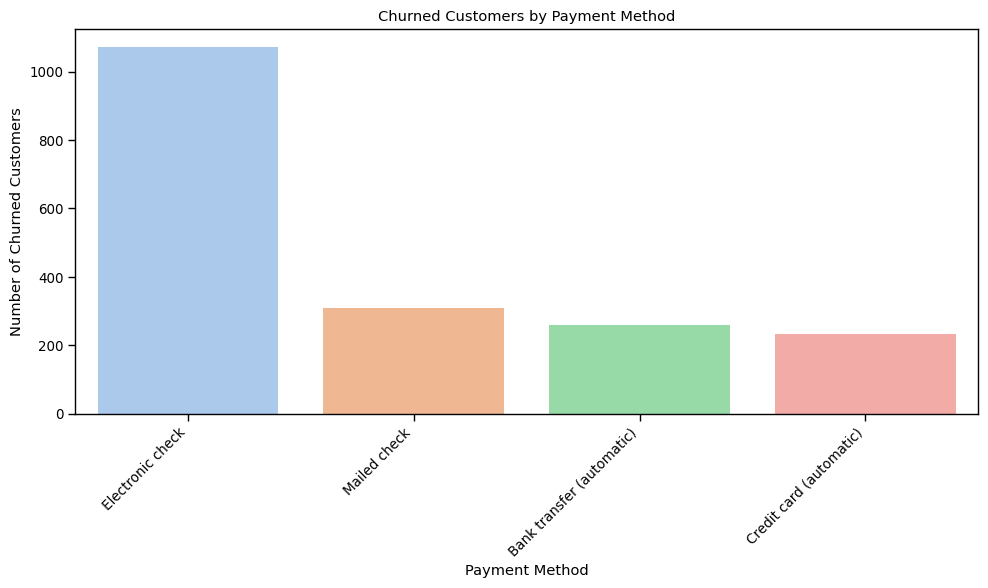

In [30]:
churn_counts_by_payment = df[df['Churn'] == 'Yes']['PaymentMethod'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_counts_by_payment.index, y=churn_counts_by_payment.values, palette='pastel')
plt.xlabel('Payment Method')
plt.ylabel('Number of Churned Customers')
plt.title('Churned Customers by Payment Method')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()







The primary group of customers who terminated their services predominantly utilized Electronic Check as their payment method. Conversely, those who selected Credit-Card automatic transfer, Bank Automatic Transfer, or Mailed Check were notably less inclined to churn.

*Customers typically initiate electronic check payments through online banking platforms, where they provide their bank account information 

_____________________________________________________________________________________________________________

**4) Churned and non-churned customers among those with and without partners.**

In [18]:
partner_counts = df['Partner'].value_counts()
partner_counts

Partner
No     3639
Yes    3393
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

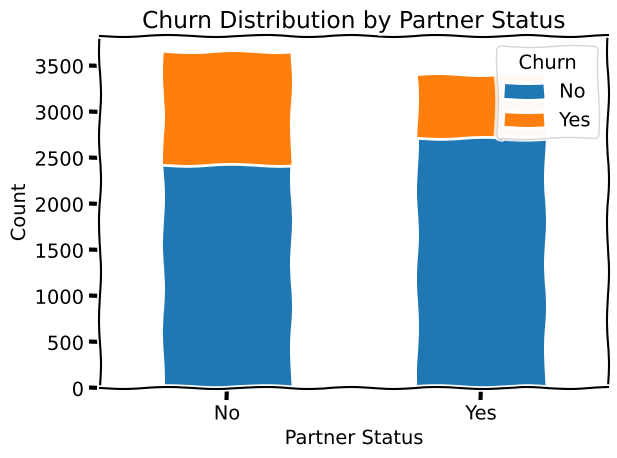

In [59]:
#animated
churn_by_partner = df.groupby(['Partner', 'Churn']).size().unstack()
plt.figure(figsize=(10, 6))
churn_by_partner.plot(kind='bar', stacked=True, color=['#008000','#0000FF']
plt.xlabel('Partner Status')
plt.ylabel('Count')
plt.title('Churn Distribution by Partner Status')
plt.xticks(rotation=0)
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()


We can observe that customers that doesn't have partners are more likely to churn. 

_____________________________________________________________________________

**5) Churn Distribution by Internet Service Type**

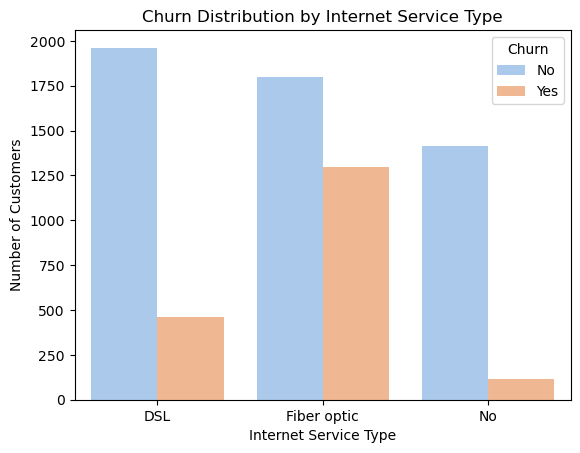

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='InternetService', hue='Churn', data=df, palette='pastel')
plt.title('Churn Distribution by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Number of Customers')
plt.show()

People using Fiber Optic internet service tend to churn more often. This could indicate technical problems or dissatisfaction with the service.

__________________________________________________________________________

**6) Distribution of montly charges by Churn**

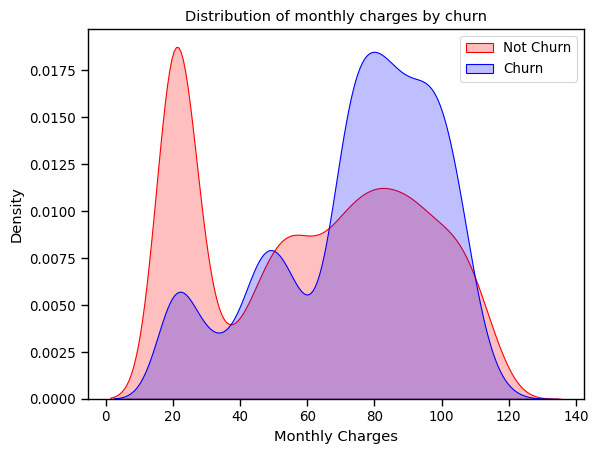

In [25]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="red", fill = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="blue", fill= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');
plt.show()


kernel density estimation (KDE) plot : Higher % of customers Churn when the monthly charges are high.

a) where you (higher density), it means there are more customers with monthly charges around those values.

b) Where you (lower density), fewer customers have monthly charges around those values.

**Conclusion** :

The use of Fiber Optic internet, Electronic Checks,Short-term contracts and the high monthly charges that are not equal the services provided lead people to swift more easily. So its import to address service quality, contract flexibility, and pricing strategies to enhance customer retention in the telecommunications industry!

**________________________________________________________________________________________________**

# Machine learning phase 

Next we step into Machine Learning, which enable us to forecast future customer churn. 
This process involves splitting our data in two groups.

- The explanatory variables or idependent features that can give a lot of information about the customers, such as the tenure, the billing methods and all the features we've previously examined. 
- The second group  is the target variable or dependent variable that is the actual Churn.
- Train a model on one subset of the data that learns patterns from the independent features 
- Making Predictions: Once the model is trained, we leverage it to make predictions on new, unseen data. 


**Data Preprocessing steps:**

Separate the dataset into two DataFrames:
- feats containing the explanatory variables,
- target containing the target variable Churn.
    

In [18]:
df = pd.read_csv('clean_churn.csv')
df = df.drop(['CustomerID'], axis=1)

In [19]:
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
feats = df.drop('Churn', axis=1)
target = df['Churn']

Split the dataset into a training set (X_train,y_train) and a test set (X_test, y_test) so that the test part contains 25% of the initial dataset.

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(feats,target,test_size= 0.25,random_state = 42)

Standardize the numerical variables ('Tenure', 'MonthlyCharges', 'TotalCharges') using StandardScaler by estimating the parameters on the training set and applying it to the training and test set.

In [22]:
from sklearn.preprocessing import StandardScaler

num_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges']
sc = StandardScaler()
X_train[num_cols] = sc.fit_transform(X_train[num_cols])
X_test[num_cols] = sc.transform(X_test[num_cols])

Some of our data is textual. They cannot be processed by our algorithms. Since the models are based on mathematical calculations, we need all our data to be numerical: we will therefore encode our categorical variables.
Encode modalities of the target variable Churn using a LabelEncoder by estimating the encoding on the training set and applying it to the training and test set.

In [24]:
from sklearn.preprocessing import LabelEncoder
def label_encode(dataframe):
    # Create a label encoder object
    label_encoder = LabelEncoder()
    
    # Iterate through each column in the DataFrame
    for column in dataframe.columns:
        # Check if the column contains object dtype (categorical)
        if dataframe[column].dtype == 'object':
            # Apply label encoding to the column
            dataframe[column] = label_encoder.fit_transform(dataframe[column])
    
    return dataframe

# Apply label encoding to training and testing features separately
X_train_encoded = label_encode(X_train)
X_test_encoded = label_encode(X_test)

In [25]:
X_train_encoded.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3161,1,0,1,0,-0.748175,1,0,0,0,0,0,2,0,0,0,0,0,-0.526380,-0.712154
4326,1,0,1,0,-0.056016,1,2,1,2,2,0,2,0,0,0,1,1,0.858262,0.290305
1922,1,0,1,1,0.595428,1,2,1,0,0,2,2,2,2,0,1,0,1.415436,1.259067
2310,1,0,1,1,0.106845,1,2,0,0,0,0,2,2,2,1,1,0,0.291139,0.171422
856,0,0,1,0,1.369017,1,2,1,2,2,0,2,0,0,1,0,2,0.806856,1.604076


**Classification**

**1. Logistic Regression**

In [26]:
from sklearn.linear_model import LogisticRegression

reglog = LogisticRegression()
reglog.fit(X_train, y_train)

print('Score on the train set', reglog.score(X_train, y_train))
print('Score on the test set', reglog.score(X_test, y_test))

Score on the train set 0.8064087978763747
Score on the test set 0.7895335608646189


Evaluate your model by displaying the classification_report and displaying the confusion matrix of it. 

(1) Instantiate a random forest model and train it on your training data.

(2) Evaluate the model using the score method on your training and test data.
Each time we train a Machine Learning algorithm in classification, we display its confusion matrix and its classification report to analyze the results.

In [28]:
from sklearn.metrics import classification_report

y_pred = reglog.predict(X_test)

display(pd.crosstab(y_test,y_pred, rownames=['True'], colnames=['Prediction']))

print(classification_report(y_test, y_pred, ))


Prediction,No,Yes
True,,
No,1159,141
Yes,229,229


              precision    recall  f1-score   support

          No       0.84      0.89      0.86      1300
         Yes       0.62      0.50      0.55       458

    accuracy                           0.79      1758
   macro avg       0.73      0.70      0.71      1758
weighted avg       0.78      0.79      0.78      1758



**2. DecisionTreeClassifier**

In [29]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

print('Score on the train set ', clf.score(X_train, y_train))
print('Score on the test set', clf.score(X_test, y_test))


Score on the train set  0.9982935153583617
Score on the test set 0.7076222980659841


In [30]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)

display(pd.crosstab(y_test,y_pred, rownames=['True'], colnames=['Prediction']))
print(classification_report(y_test, y_pred))

# As with the logistic regression, class 1 is poorly predicted by the model.

Prediction,No,Yes
True,,
No,1019,281
Yes,233,225


              precision    recall  f1-score   support

          No       0.81      0.78      0.80      1300
         Yes       0.44      0.49      0.47       458

    accuracy                           0.71      1758
   macro avg       0.63      0.64      0.63      1758
weighted avg       0.72      0.71      0.71      1758



Decision trees split data based on variables, minimizing a chosen function. The `feature_importances_` attribute reveals the importance of each variable in the decision-making process.

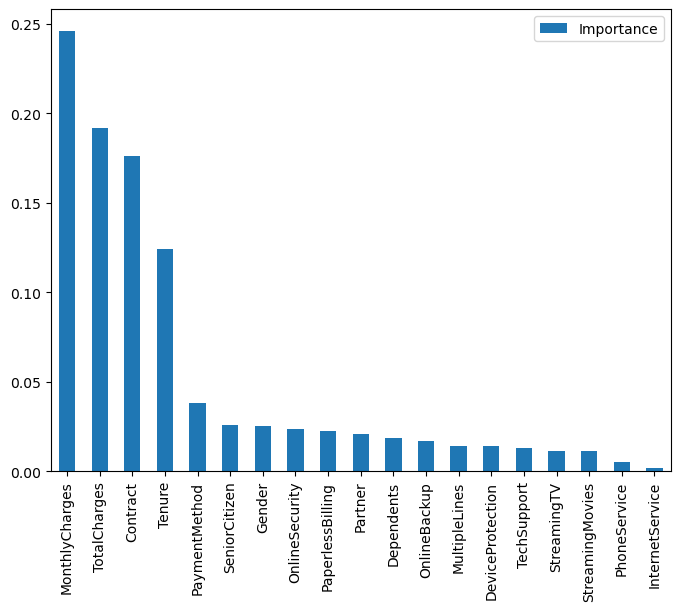

In [31]:
import matplotlib.pyplot as plt

feat_importances = pd.DataFrame(clf.feature_importances_, index=feats.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))
plt.show()

The variables MonthlyCharges, TotalCharges, Contract and Tenure are the most important variables for the classification of the decision tree. We could use these importances to try to reduce the size of our dataset and to lead to more efficient, interpretable, and cost-effective machine learning models.

**2. RandomForest Classifier**

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print('Score on the train set', rf.score(X_train, y_train))
print('Score on the train set', rf.score(X_test, y_test))

Score on the train set 0.9982935153583617
Score on the train set 0.7889647326507395


A score of 0.998 on the training set suggests that our model achieved very high accuracy or performed very well according to the chosen metric on the data it was trained on. This could indicate that your model has learned the patterns in the training data very well.

A score of 0.782 on the test set suggests that our model's performance on unseen data (the test set) is lower compared to the training set. This is expected because the model may have overfit to the training data, meaning it learned to memorize the training examples instead of generalizing well to new, unseen examples.


**Evaluate our model by displaying the classification_report and displaying the confusion matrix of it.**

In [44]:
from sklearn.metrics import classification_report

y_pred = rf.predict(X_test)

print(pd.crosstab(y_test,y_pred))
print(classification_report(y_test, y_pred))


col_0    No  Yes
Churn           
No     1161  139
Yes     245  213
              precision    recall  f1-score   support

          No       0.83      0.89      0.86      1300
         Yes       0.61      0.47      0.53       458

    accuracy                           0.78      1758
   macro avg       0.72      0.68      0.69      1758
weighted avg       0.77      0.78      0.77      1758



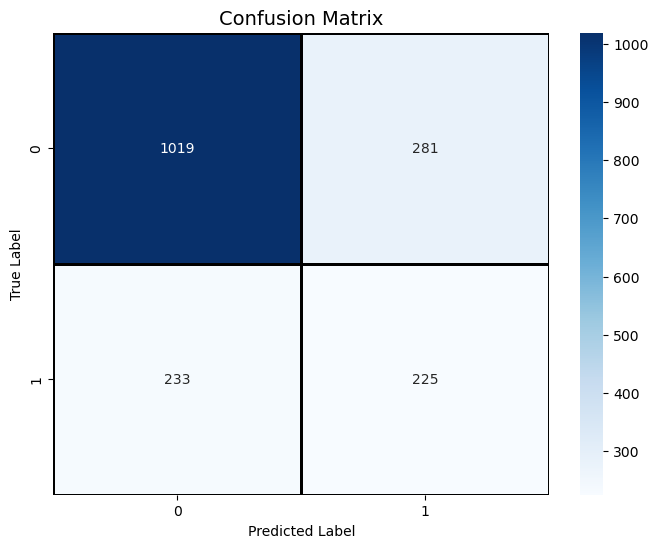

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linecolor="k", linewidths=1)

plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

- The model's precision for predicting "Yes" is moderate (61%), meaning it correctly identifies some positive cases but also misclassifies others. 
- The recall for "Yes" is relatively low (47%), indicating it misses many actual positive cases. Overall, the model's accuracy is 78%, suggesting it correctly predicts about 78% of cases. 
Further optimization or adjustments in the model are essensial to enhance its performance.

__________________________________________________________________________________________________________________

We tackled a business challenge by developing a model to predict customer churn in company contracts. Our top-performing algorithm, RandomForest, offers most accurate predictions. Next, we could refine model parameters to optimize performance and minimize overfitting.